In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.tsa import stattools, ar_model

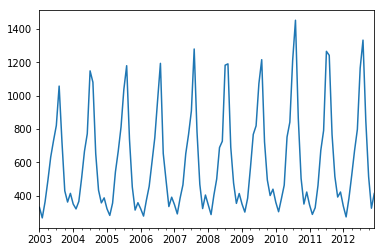

In [2]:
df_ice = pd.read_csv('C:/home/myproj/study_ml/ap_timeseries/chap1/icecream.csv')
y = pd.Series(df_ice.icecream.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [3]:
ctt = stattools.adfuller(y[:100], regression="ctt")
ct = stattools.adfuller(y[:100], regression="ct")
c = stattools.adfuller(y[:100], regression="c")
nc = stattools.adfuller(y[:100], regression="nc")

print("ctt", ctt[1])
print("ct", ct[1])
print("c", c[1])
print("nc", nc[1])


ctt 0.1692244861968732
ct 0.7444294601457631
c 0.8583259363632654
nc 0.9751761218376868


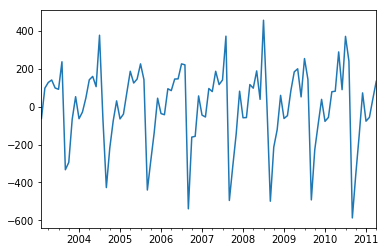

In [4]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [5]:
ctt = stattools.adfuller(y_diff[:100], regression="ctt")
ct = stattools.adfuller(y_diff[:100], regression="ct")
c = stattools.adfuller(y_diff[:100], regression="c")
nc = stattools.adfuller(y_diff[:100], regression="nc")

print("ctt", ctt[1])
print("ct", ct[1])
print("c", c[1])
print("nc", nc[1])


ctt 0.0
ct 0.0
c 0.0
nc 0.0


In [6]:
model  = ar_model.AR(y_diff)

In [7]:
for i in range(20):
    results = model.fit(maxlag=i+1)
    print('lag = ', i+1, 'aic:', results.aic)

lag =  1 aic: 10.623349835083612
lag =  2 aic: 10.605625887136187
lag =  3 aic: 10.631794365499909
lag =  4 aic: 10.653968819566964
lag =  5 aic: 10.639020494849978
lag =  6 aic: 10.497805079154896
lag =  7 aic: 10.501645560833579
lag =  8 aic: 10.347418412668333
lag =  9 aic: 10.145773136713263
lag =  10 aic: 9.54739319159168
lag =  11 aic: 8.688494352586085
lag =  12 aic: 8.726168706454176
lag =  13 aic: 8.749080458269447
lag =  14 aic: 8.787463716774607
lag =  15 aic: 8.822181088075927
lag =  16 aic: 8.861619646480914
lag =  17 aic: 8.900710667979506
lag =  18 aic: 8.712739176754758
lag =  19 aic: 8.74636247304398
lag =  20 aic: 8.766450545272324


In [9]:
result11 = model.fit(maxlag=12, ic='aic')
print(result11.k_ar)

11


<BarContainer object of 88 artists>

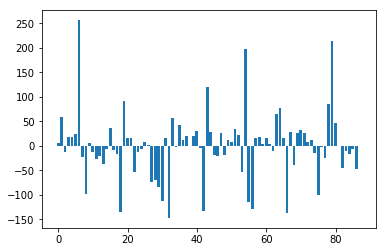

In [12]:
#残差の確認
res11 = result11.resid
plt.bar(range(len(res11)), res11)

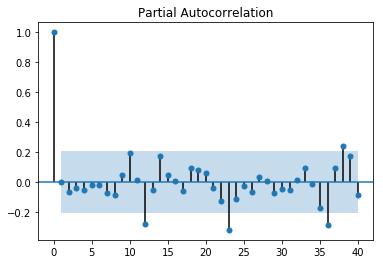

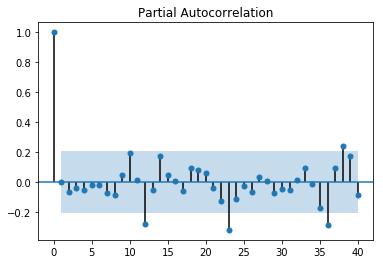

In [14]:
from statsmodels.graphics import tsaplots
tsaplots.plot_pacf(res11, lags=40)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


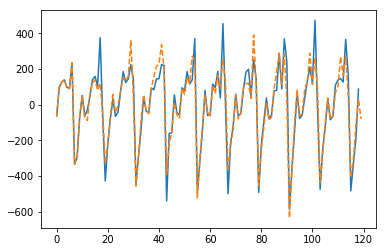

In [19]:
plt.plot(y.diff().dropna().values, label="observation")
plt.plot(np.hstack([y_diff[:11], result11.fittedvalues, result11.predict(98-11, 107, dynamic =True)]), '--', label="forcast")